# IIP - Project 1
### 6252320 - Leon Debnath

Import the required modules for the notebook

In [78]:
from ex_1 import rgb2hsi, rgb2hsv
import matplotlib.pyplot as plt
import cv2

Due to the amount of image plotting required, a helper function was used to abstract the display of images into a single `display()` function that takes a list of images and corresponding labels.

In [87]:
import math

def display(images: list, labels:list[str], axis='off'):
    
    if len(images) != len(labels):
        raise Exception("images and labels don't correspond")
        
    fig = plt.figure(figsize=(15,10))
    cols = 2
    rows = math.ceil(len(images)/2)
    
    for i in range(len(images)):
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(images[i])
        plt.title(labels[i])
        plt.axis(axis)

## Exercise 1 - Colour Spaces

### a. RGB to HSV
Initially the images are loaded using cv2 (in BGR), and converted to the RGB colour space. 

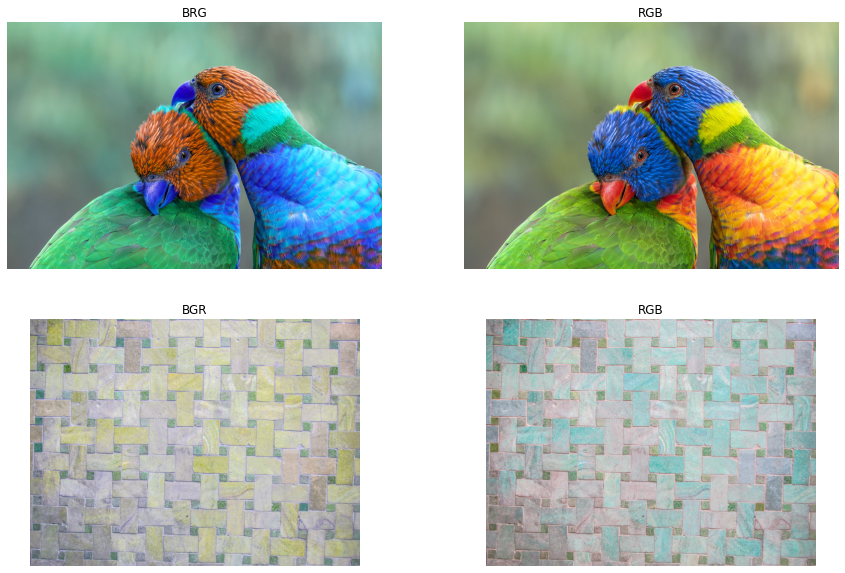

In [88]:
img1_bgr = cv2.imread('images/birds.jpg')
img1_rgb = cv2.cvtColor(img1_bgr, cv2.COLOR_BGR2RGB)
img2_bgr = cv2.imread('images/stone.jpg')
img2_rgb = cv2.cvtColor(img2_bgr, cv2.COLOR_BGR2RGB)

display([img1_bgr, img1_rgb, img2_bgr, img2_rgb], ['BRG', 'RGB', 'BGR', 'RGB'])

The **RGB** colour space uses three values in the range $\{0 - 255\}$ for the primary colours; **red**, **green**, and **blue**, which are additively combined into the final colour.  Alternatively **HSV/HSI** use the combination of a **hue** (a $360^{\circ}$ that rotates through all of the visible colours), a level of colour **saturation**, and the **value** or **intensity** respectively

To convert from RGB to HSV, the following set of formulae can be used:

**Value:**
$$ 
\begin{equation}
V = max(R, G, B)
\end{equation} 
$$
**Saturation:**
$$
\begin{matrix}
 S = & \frac{V - min(R,G,B)}{V} &\text{  if } V \neq 0  \\
  & 0 &\text{otherwise}
\end{matrix}
$$
**Hue:**
$$
\begin{matrix}
      & \frac{60 \cdot (G - B)}{V - min(R,G,B)} & \text{  if } V = R  \\
 H =  & \frac{120 + 60 \cdot (B - R)}{V - min(R,G,B)} & \text{  if } V = G  \\
      & \frac{240 + 60 \cdot (R - G)}{V - min(R,G,B)} & \text{  if } V = B  \\
      & 0 & \text{ if } R = B = G
\end{matrix}
$$

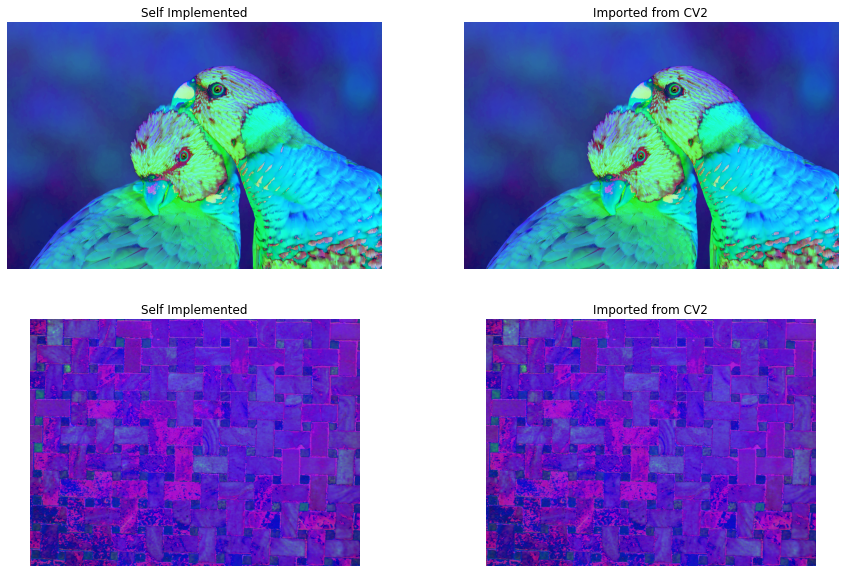

In [90]:
img1_imp_hsv = rgb2hsv(img1_rgb)
img1_cv2_hsv = cv2.cvtColor(img1_rgb, cv2.COLOR_RGB2HSV)
img2_imp_hsv = rgb2hsv(img2_rgb)
img2_cv2_hsv = cv2.cvtColor(img2_rgb, cv2.COLOR_RGB2HSV)

display([img1_imp_hsv, img1_cv2_hsv, img2_imp_hsv, img2_cv2_hsv], 
        ['Self Implemented', 'Imported from CV2', 'Self Implemented', 'Imported from CV2'])

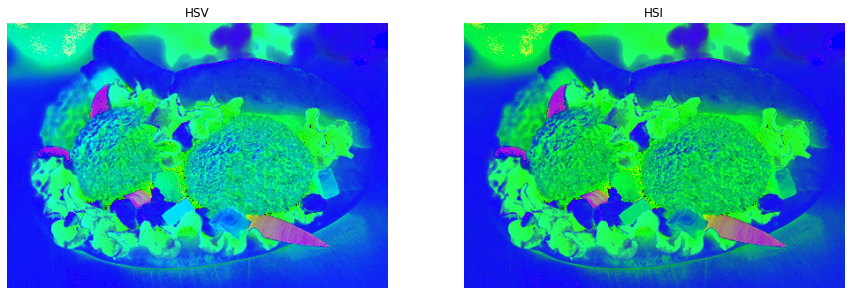

In [76]:
img_hsi = rgb2hsi(img_rgb)

display([img_hsv, img_hsi], ['HSV', 'HSI'])